In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib


In [36]:
sheet_name = "Sheet2"
path = r"Prediction_Data.xlsx"

# Read all sheets
df_dict = pd.read_excel(path, sheet_name =sheet_name)
print(df_dict.keys())  # Shows all sheet names

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'State',
       'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
      dtype='object')
Empty DataFrame
Columns: []
Index: []


In [49]:
#Convert to dataframe
data = pd.DataFrame(df_dict)

In [41]:
#Show head
df1.head()1

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,12266-HAR,Female,46,No,Haryana,2,5,NaN,Yes,Yes,...,Bank Withdrawal,79.650002,3870.300049,0.0,0,429.119995,4299.419922,Stayed,Others,Others
1,12272-WES,Male,66,No,West Bengal,9,8,NaN,No,No,...,Credit Card,39.099998,1982.099976,0.0,130,0.000000,2112.100098,Stayed,Others,Others
2,12281-RAJ,Male,80,No,Rajasthan,14,25,NaN,Yes,Yes,...,Credit Card,78.099998,864.849976,0.0,0,194.259995,1059.109985,Stayed,Others,Others
3,12296-MAD,Male,65,Yes,Madhya Pradesh,14,2,NaN,No,No,...,Bank Withdrawal,45.000000,1228.650024,0.0,0,0.000000,1228.650024,Stayed,Others,Others
4,12303-BIH,Female,56,No,Bihar,7,14,NaN,Yes,Yes,...,Credit Card,88.550003,6362.350098,0.0,0,3319.199951,9681.549805,Stayed,Others,Others


In [50]:
data['Value_Deal'] = data['Value_Deal'].fillna('None')

In [51]:
data['Value_Deal']

0         None
1         None
2         None
3         None
4         None
         ...  
6002      None
6003      None
6004    Deal 4
6005    Deal 3
6006      None
Name: Value_Deal, Length: 6007, dtype: object

In [52]:
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Confusion Matrix:
[[827  51]
 [102 222]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       878
           1       0.81      0.69      0.74       324

    accuracy                           0.87      1202
   macro avg       0.85      0.81      0.83      1202
weighted avg       0.87      0.87      0.87      1202



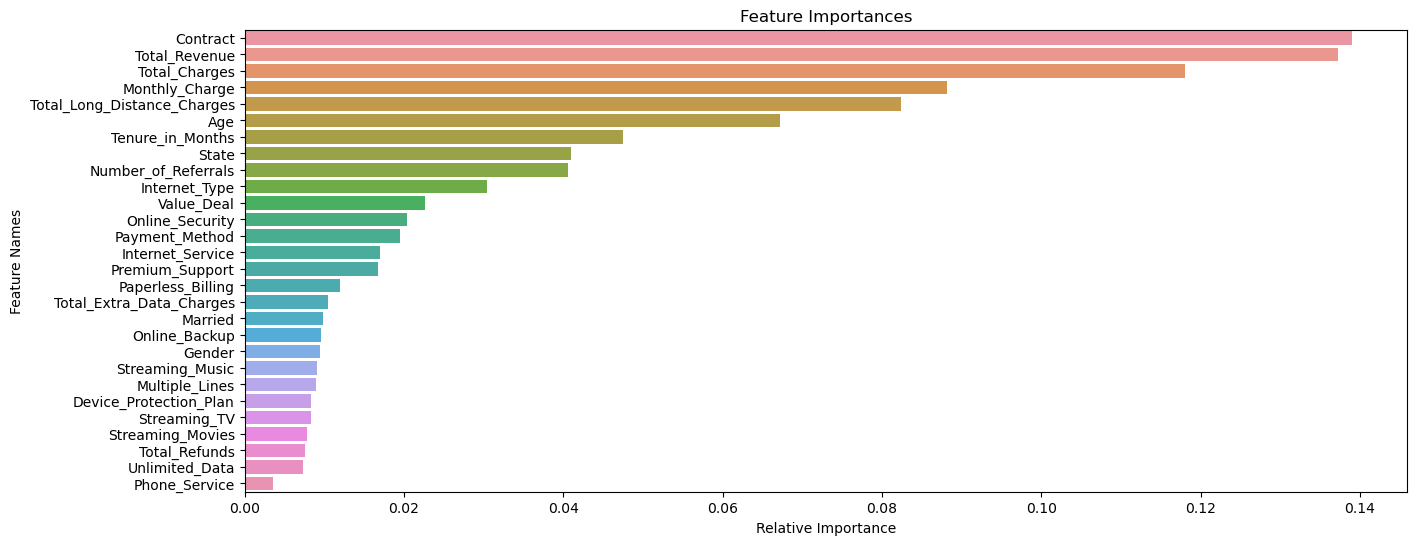

In [54]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [60]:
sheet_name = "Sheet2"
path = r"E:\365Datascience\Spark,Azure and data engineering\Data & Resources\Testing.xlsx"

# Read all sheets
data = pd.read_excel(path, sheet_name =sheet_name)


In [65]:
# Retain the original DataFrame to preserve unencoded columns
original_data = data.copy()

# Retain the Customer_ID column
customer_ids = data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
original_data.to_csv(r"Predictions.csv", index=False)
